In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Creación de un conjunto de datos para entrenamiento
trX = np.linspace(-2, 2, 101)
trY = 3 + 2 * trX + np.random.randn(*trX.shape) * 0.33

def fxy(x):
    return x[0]**4+x[1]**4-4*x[0]*x[1]+x[1]/2+1

def dfxy(x):
    return np.array([4*x[0]**3-4*x[1],4*x[1]**3-4*x[0]])

def Rosenbrock2d(x):
    return 100*(x[1]-x[0]**2)**2 + (1-x[0])**2

def dRosenbrock2d(x):
    return np.array([400*x[0]**3-400*x[0]*x[1]+2*x[0]-2, 200*(x[1]-x[0]**2)])

def Rosenbrock10d(x):
    result = 0
    for i in range(9):
        result += 100*(x[i+1]-x[i]**2)**2 + (1-x[i])**2
    return result

def dRosenbrock10d(x):
    arreglo = np.zeros(10)
    for i in range(9):
        arreglo[i] = arreglo[i] + 400*x[i]**3-400*x[i]*x[i+1]+2*x[i]-2
        arreglo[i+1] = arreglo[i+1] + 200*(x[i+1]-x[i]**2)
    return arreglo

def plotError(errors, n):
    plt.figure()
    plt.plot(errors[1:min(len(errors),n)], label="Convergencia de error")
    plt.xlabel('iteracion')
    plt.ylabel('error')
    plt.legend()
    plt.show

def descenso_max(f, df, xo, alpha, maxIter, epsilon, crit=None):
    xk, fxk, errors, iterNum, convergencia = [], [], [], 0, 0
    i = 0
    x = np.copy(xo)
    oldx = np.copy(x)

    while i < maxIter:
        oldx = np.copy(x)
        gr = df(x)
        xk.append(np.copy(x))
        fxk.append(f(x))
        x -= alpha*gr
        error = np.linalg.norm(oldx-x, x.size)
        errors.append(error)
        if error < epsilon:
            convergencia = 1
            break
        i+=1
        iterNum = i
    return x, xk, fxk, errors, iterNum, convergencia

x:  [0.99999835 1.00000162] 
xk: [array([1., 0.]), array([0.6, 0.4]), array([0.6736, 0.6144]), array([0.79710511, 0.79106871]), array([0.91094783, 0.91189369]), array([0.97333405, 0.97295871]), array([0.99367097, 0.99387231]), array([0.99876676, 0.99864896]), array([0.99970441, 0.99977472]), array([0.9999689 , 0.99992676]), array([0.99997692, 1.0000022 ]), array([1.0000055 , 0.99999033]), array([0.99999503, 1.00000413]), array([1.00000265, 0.99999719])] 
fxk:  [2.0, 0.3952, 0.00013457582981113436, -0.3314091688787686, -0.4867167923530973, -0.5079050458818966, -0.5027552747826254, -0.500662124920785, -0.5001120758060067, -0.5000365925559844, -0.4999988948398324, -0.5000048351881661, -0.4999979331866382, -0.5000014068388565] 
errors:  [0.5656854249492381, 0.22668109757983795, 0.21555821692379493, 0.16600856081478563, 0.08729820008142876, 0.02917137567775455, 0.006984518339821225, 0.0014651008624752702, 0.00030507767689295283, 7.587115610139711e-05, 3.094500417856936e-05, 1.73233052194133

,primeras 4 xk,ultimas 4 xk,primeras 4 f(xk),ultimas 4 f(xk),primeros 4 errores,ultimos 4 errores
0,"[0.6, 0.4]","[0.9999769210293519, 1.0000022034636742]",0.395200,-0.499999,0.226681,0.000031
1,"[0.6736, 0.6144000000000001]","[1.0000054965404375, 0.9999903277131796]",0.000135,-0.500005,0.215558,0.000017
2,"[0.7971051134976, 0.7910687064064]","[0.99999503174093, 1.0000041329612757]",-0.331409,-0.499998,0.166009,0.000010
3,"[0.9109478334449415, 0.9118936929728697]","[1.000002646806704, 0.9999971860836192]",-0.486717,-0.500001,0.087298,0.000006


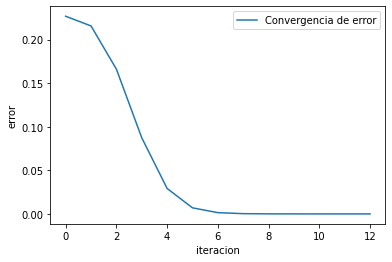

In [209]:
x, xk, fxk, errors, iterNum, convergencia = descenso_max(fxy, dfxy, np.array([1.0, 0.0]), 0.1, 2000, 1.0e-5)
print('x: ', x, '\nxk:', xk, '\nfxk: ', fxk, '\nerrors: ', errors, '\nnumero de iteraciones: ', iterNum, '\nConvergencia: ', convergencia)
dictionary = {'primeras 4 xk': xk[1:5], 'ultimas 4 xk': xk[-4:],'primeras 4 f(xk)': fxk[1:5], 'ultimas 4 f(xk)': fxk[-4:],'primeros 4 errores': errors[1:5], 'ultimos 4 errores': errors[-4:]}
df = pd.DataFrame(dictionary)
plotError(errors, 2000)
df

x:  [0.99944182 0.99888173] 
xk: [array([0.99944004, 0.99887814]), array([0.99944048, 0.99887904]), array([0.99944093, 0.99887994]), array([0.99944138, 0.99888083])] 
fxk:  [3.140617759850488e-07, 3.1355983175646594e-07, 3.130586901106708e-07, 3.1255834976348737e-07] 
errors:  [1.0021427392371203e-06, 1.0013412314118408e-06, 1.0005403655119245e-06, 9.997401408092145e-07] 
numero de iteraciones:  7873 
Convergencia:  1
[0.99944182 0.99888173] 7873 1


,primeras 4 xk,ultimas 4 xk,primeras 4 f(xk),ultimas 4 f(xk),primeros 4 errores,ultimos 4 errores
0,"[0.004, 0.0]","[0.9994400363032374, 0.9988781446612035]",0.992016,3.140618e-07,0.003984,1.002143e-06
1,"[0.0079839488, 6.4e-06]","[0.999440483958463, 0.9988790412630487]",0.984096,3.135598e-07,0.003968,1.001341e-06
2,"[0.011951646743138776, 2.9337375376408573e-05]","[0.9994409312554906, 0.9988799371478799]",0.976241,3.130587e-07,0.003951,1.000540e-06
3,"[0.01590275490376425, 7.473916917495703e-05]","[0.9994413781946202, 0.9988808323162649]",0.968451,3.125583e-07,0.003935,9.997401e-07


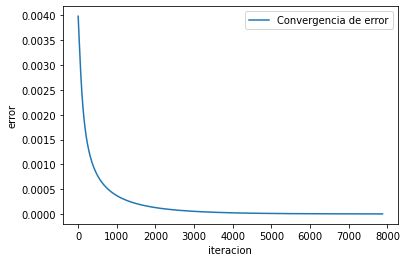

In [210]:
x, xk, fxk, errors, iterNum, convergencia = descenso_max(Rosenbrock2d, dRosenbrock2d, np.array([0.0, 0.0]), 0.002, 10000, 1.0e-6)
print('x: ', x, '\nxk:', xk[-4:], '\nfxk: ', fxk[-4:], '\nerrors: ', errors[-4:], '\nnumero de iteraciones: ', iterNum, '\nConvergencia: ', convergencia)
print(x, iterNum, convergencia)
dictionary = {'primeras 4 xk': xk[1:5], 'ultimas 4 xk': xk[-4:],'primeras 4 f(xk)': fxk[1:5], 'ultimas 4 f(xk)': fxk[-4:],'primeros 4 errores': errors[1:5], 'ultimos 4 errores': errors[-4:]}
df = pd.DataFrame(dictionary)
plotError(errors, 10000)
df

x:  [0.99999617 0.99999233 0.99998462 0.99996917 0.99993819 0.99987608
 0.99975155 0.99950192 0.9990016  0.9979992 ] 
xk: [array([0.99999616, 0.99999231, 0.99998459, 0.99996911, 0.99993807,
       0.99987583, 0.99975105, 0.99950092, 0.9989996 , 0.9979952 ]), array([0.99999617, 0.99999232, 0.9999846 , 0.99996913, 0.9999381 ,
       0.99987589, 0.99975118, 0.99950117, 0.9990001 , 0.9979962 ]), array([0.99999617, 0.99999232, 0.99998461, 0.99996914, 0.99993813,
       0.99987595, 0.9997513 , 0.99950142, 0.9990006 , 0.9979972 ]), array([0.99999617, 0.99999233, 0.99998462, 0.99996916, 0.99993816,
       0.99987602, 0.99975143, 0.99950167, 0.9990011 , 0.9979982 ])] 
fxk:  [1.3357028047110412e-06, 1.3343684870021295e-06, 1.333035503367417e-06, 1.3317038524711459e-06] 
errors:  [1.0011379145052943e-06, 1.0006374528166165e-06, 1.0001372418416455e-06, 9.996372815793159e-07] 
numero de iteraciones:  12832 
Convergencia:  1
[0.99999617 0.99999233 0.99998462 0.99996917 0.99993819 0.99987608
 0.99975

,primeras 4 xk,ultimas 4 xk,primeras 4 f(xk),ultimas 4 f(xk),primeros 4 errores,ultimos 4 errores
0,"[0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.0...","[0.999996164366215, 0.9999923143617598, 0.9999...",8.967223,0.000001,0.002125,1.001138e-06
1,"[0.0039975968, 0.0035983968, 0.0035983968, 0.0...","[0.9999961662833518, 0.9999923182032034, 0.999...",8.944834,0.000001,0.002016,1.000637e-06
2,"[0.005995330028326848, 0.004879877548769038, 0...","[0.9999961681995282, 0.9999923220427231, 0.999...",8.929022,0.000001,0.002002,1.000137e-06
3,"[0.007994955760417066, 0.0059108086963059565, ...","[0.9999961701147447, 0.9999923258803195, 0.999...",8.917396,0.000001,0.002003,9.996373e-07


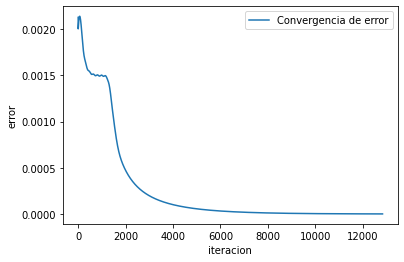

In [211]:
x, xk, fxk, errors, iterNum, convergencia = descenso_max(Rosenbrock10d, dRosenbrock10d, np.zeros(10), 0.001, 20000, 1.0e-6)
print('x: ', x, '\nxk:', xk[-4:], '\nfxk: ', fxk[-4:], '\nerrors: ', errors[-4:], '\nnumero de iteraciones: ', iterNum, '\nConvergencia: ', convergencia)
print(x, iterNum, convergencia)
dictionary = {'primeras 4 xk': xk[1:5], 'ultimas 4 xk': xk[-4:],'primeras 4 f(xk)': fxk[1:5], 'ultimas 4 f(xk)': fxk[-4:],'primeros 4 errores': errors[1:5], 'ultimos 4 errores': errors[-4:]}
df = pd.DataFrame(dictionary)
plotError(errors, 20000)
df

EJERCICIO 2

In [2]:
import math
import random

In [3]:
def plotTSP(caminos, puntos, iteraciones=1):

    x = []; y = []
    for i in caminos[0]:
        x.append(puntos[i][0])
        y.append(puntos[i][1])

    plt.plot(x, y, 'co')

    escala = float(max(x))/float(100)

    if iteraciones > 1:

        for i in range(1, iteraciones):

            xi = []; yi = []
            for j in caminos[i]:
                xi.append(puntos[j][0])
                yi.append(puntos[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]),
                    head_width = escala, color = 'r',
                    length_includes_head = True, ls = 'dashed',
                    width = 0.001/float(iteraciones))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                        head_width = escala, color = 'r', length_includes_head = True,
                        ls = 'dashed', width = 0.001/float(iteraciones))

    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = escala,
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = escala,
                color = 'g', length_includes_head = True)

    plt.xlim(min(x)*1.1, max(x)*1.1)
    plt.ylim(min(y)*1.1, max(y)*1.1)
    plt.show()

In [4]:
class Enfriamiento(object):
    def __init__(self, coordenadas,ciudades, T=-1, alfa=-1, T_detenido=-1, iteracion_detenida=-1):
        self.coordenadas = coordenadas
        self.N = ciudades
        self.T = math.sqrt(self.N) if T == -1 else T
        self.T_guardar = self.T  
        self.alfa = 0.995 if alfa == -1 else alfa
        self.T_detenido_temperatura = 1e-8 if T_detenido == -1 else T_detenido
        self.iteracion_detenida = 100000 if iteracion_detenida == -1 else iteracion_detenida
        self.iteracion = 1

        self.nodos = [i for i in range(self.N)]

        self.mejor_solucion = None
        self.mejor_fit = float("Inf")
        self.lista_fit = []

    def initial_solucion(self):
        nodo_actual = random.choice(self.nodos)  
        solucion = [nodo_actual]

        nodos_libres = set(self.nodos)
        nodos_libres.remove(nodo_actual)
        while nodos_libres:
            next_nodo = min(nodos_libres, key=lambda x: self.distancia(nodo_actual, x))  
            nodos_libres.remove(next_nodo)
            solucion.append(next_nodo)
            nodo_actual = next_nodo

        fit_actual = self.fitness(solucion)
        if fit_actual < self.mejor_fit: 
            self.mejor_fit = fit_actual
            self.mejor_solucion = solucion
        self.lista_fit.append(fit_actual)
        return solucion, fit_actual

    def distancia(self, nodo_0, nodo_1):
        coord_0, coord_1 = self.coordenadas[nodo_0], self.coordenadas[nodo_1]
        return math.sqrt((coord_0[0] - coord_1[0]) ** 2 + (coord_0[1] - coord_1[1]) ** 2)

    def fitness(self, solucion):

        fit_actual = 0
        for i in range(self.N):
            fit_actual += self.distancia(solucion[i % self.N], solucion[(i + 1) % self.N])
        return fit_actual

    def p_aceptar(self, candidatos_fit):
        return math.exp(-abs(candidatos_fit - self.fit_acutales) / self.T)

    def aceptar(self, candidato):
        candidatos_fit = self.fitness(candidato)
        if candidatos_fit < self.fit_acutales:
            self.fit_acutales, self.cur_solucion = candidatos_fit, candidato
            if candidatos_fit < self.mejor_fit:
                self.mejor_fit, self.mejor_solucion = candidatos_fit, candidato
        else:
            if random.random() < self.p_aceptar(candidatos_fit):
                self.fit_acutales, self.cur_solucion = candidatos_fit, candidato

    def algoritmo_recorrido_simulado(self):
        self.cur_solucion, self.fit_acutales = self.initial_solucion()
        while self.T >= self.T_detenido_temperatura and self.iteracion < self.iteracion_detenida:
            candidato = list(self.cur_solucion)
            l = random.randint(2, self.N - 1)
            i = random.randint(0, self.N - l)
            candidato[i : (i + l)] = reversed(candidato[i : (i + l)])
            self.aceptar(candidato)
            self.T *= self.alfa
            self.iteracion += 1

            self.lista_fit.append(self.fit_acutales)

        print("Mejor modelo obtenido: ", self.mejor_fit)
        improvement = 100 * (self.lista_fit[0] - self.mejor_fit) / (self.lista_fit[0])
        print("Mejora sobre la heuristica:", str(improvement)+"%")

    def lote_recorrido(self, times=10):
        for i in range(1, times + 1):
            print(f"iteracion {i}/{times} -------------------------------")
            self.T = self.T_guardar
            self.iteracion = 1
            self.cur_solucion, self.fit_acutales = self.initial_solucion()
            self.algoritmo_recorrido_simulado()

    def visualizacion_rutas(self):
        plotTSP([self.mejor_solucion], self.coordenadas)

    def mostrar_aprendizaje(self):
        plt.plot([i for i in range(len(self.lista_fit))], self.lista_fit)
        plt.ylabel("Fitness")
        plt.xlabel("iteracion")
        plt.show()

In [8]:
def leer_coordenadas(camino, inicial):
    coordenadas = []
    coordenadas.append(inicial)
    with open(camino, "r") as f:
        next(f)
        for line in f.readlines():
            line = [float(x.replace("\n", "")) for x in line.split(" ")]
            coordenadas.append(line)
    return coordenadas


def generacion_coordenadas_aleatorias(num_nodos):
    return [[random.uniform(-1000, 1000), random.uniform(-1000, 1000)] for i in range(num_nodos)]

CIUDADES: 20
Mejor modelo obtenido:  253.68375365653864
Mejora sobre la heuristica: 12.074417679907754%


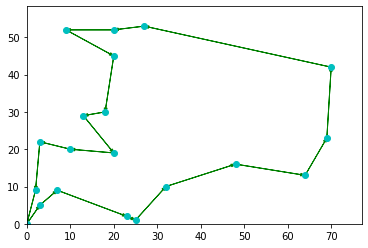

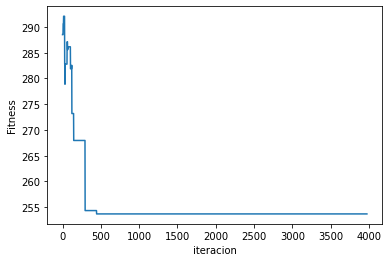

In [12]:
x = float(input("Ingrese la coordenada en X"))
y = float(input("Ingrese la coordenada en Y"))
inicial = [x,y]
coordenadas = leer_coordenadas("coordenadas.txt", inicial)  
with open("coordenadas.txt") as f:
    firstline = f.readline().rstrip()
ciudades = firstline
print("CIUDADES:",ciudades)
sa = Enfriamiento(coordenadas, int(ciudades), iteracion_detenida=5000)
sa.algoritmo_recorrido_simulado()
sa.visualizacion_rutas()
sa.mostrar_aprendizaje()